# Xception con extracción de características y afinamiento

## Configuaración del entorno

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [4]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

In [5]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


## Primer paso: extracción de características

In [6]:
xception_base = keras.applications.Xception(
    weights='imagenet', 
    include_top=False) 
xception_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [7]:
inputs = keras.Input(shape=(size_x , size_y, 3))
xception_base.trainable = False

x = keras.applications.xception.preprocess_input(inputs) 
x = xception_base(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(58, activation="softmax")(x)

model6 = keras.Model(inputs, outputs)

model6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 256, 256, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 2048)        0         
_________________________________________________________________
dense (Dense)                (None, 4, 4, 256)         524544    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0     

In [10]:
inputs = keras.Input(shape=(size_x , size_y, 3))
xception_base.trainable = False

x = keras.applications.xception.preprocess_input(inputs) 
x = xception_base(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(58, activation="softmax")(x)

model6 = keras.Model(inputs, outputs)

model6.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 256, 256, 3)       0         
_________________________________________________________________
tf.math.subtract_2 (TFOpLamb (None, 256, 256, 3)       0         
_________________________________________________________________
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 2048)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 4, 4, 256)         524544    
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0   

In [11]:
model6.compile(loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])
    
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/best_version",
    save_best_only=True,
    monitor="val_loss")
    ]

history = model6.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
145/145 [==============================] - 45s 288ms/step - loss: 1.5302 - accuracy: 0.5647 - val_loss: 0.6921 - val_accuracy: 0.7647
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
145/145 [==============================] - 40s 270ms/step - loss: 0.5339 - accuracy: 0.8261 - val_loss: 0.5778 - val_accuracy: 0.8103
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/10
145/145 [==============================] - 40s 267ms/step - loss: 0.3539 - accuracy: 0.8832 - val_loss: 0.5238 - val_accuracy: 0.8526
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/10
145/145 [==============================] - 39s 263ms/step - loss: 0.2536 - accuracy: 0.9169 - val_loss: 0.4636 - val_accuracy: 0.8629
INFO:tensorflow:Assets written to: model6\best_version\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/10
145/145 [==============================] - 42s 280ms/step - loss: 0.1999 - accuracy: 0.9312 - val_loss: 0.5523 - val_accuracy: 0.8534
Epoch 6/10
145/145 [==============================] - 39s 264ms/step - loss: 0.1583 - accuracy: 0.9487 - val_loss: 0.4644 - val_accuracy: 0.8776
Epoch 7/10
145/145 [==============================] - 40s 273ms/step - loss: 0.1355 - accuracy: 0.9563 - val_loss: 0.6461 - val_accuracy: 0.8638
Epoch 8/10
145/145 [==============================] - 40s 268ms/step - loss: 0.1220 - accuracy: 0.9615 - val_loss: 0.5747 - val_accuracy: 0.8759
Epoch 9/10
145/145 [==============================] - 41s 274ms/step - loss: 0.1166 - accuracy: 0.9661 - val_loss: 0.7397 - val_accuracy: 0.8612
Epoch 10/10
145/145 [==============================] - 42s 283ms/step - loss: 0.0996 - accuracy: 0.9713 - val_loss: 0.5793 - val_accuracy: 0.8750


In [12]:
model6.save('model6/model')
np.save('model6/history.npy',history.history)

INFO:tensorflow:Assets written to: model6/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


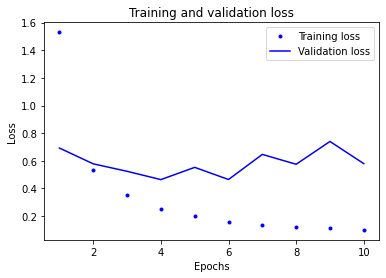

In [13]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "b.", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

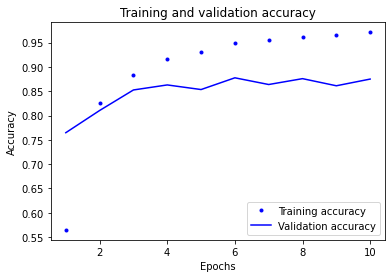

In [14]:
plt.clf()

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, "b.", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
results= model6.evaluate(test_dataset)
results

19/19 [==============================] - 5s 227ms/step - loss: 0.6439 - accuracy: 0.8759


[0.6439470052719116, 0.8758620619773865]

In [16]:
model = keras.models.load_model('model6/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 230ms/step - loss: 0.4596 - accuracy: 0.8603


[0.45960044860839844, 0.8603448271751404]

## Segundo paso: ajuste y afinamiento

In [17]:
model = keras.models.load_model('model6/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 243ms/step - loss: 0.4596 - accuracy: 0.8603


[0.4595980942249298, 0.8603448271751404]

In [19]:
for layer in model.layers:
    print(layer.name)

input_4
tf.math.truediv_2
tf.math.subtract_2
xception
max_pooling2d_2
dense_4
flatten_2
dropout_2
dense_5


In [20]:
xception = model.get_layer('xception')
for layer in xception.layers:
    print(layer.name)

input_1
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d
block2_pool
batch_normalization
add
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_1
block3_pool
batch_normalization_1
add_1
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_2
block4_pool
batch_normalization_2
add_2
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_3
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_4
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
block7_sepconv2_

In [23]:
def freeze_layers(model, trainable):
    for layer in model.layers[:(len(model.layers) - trainable)]:
        layer.trainable = False

    for layer in model.layers[(len(model.layers) - trainable):]:
        if not "batch_normalization" in layer.name:
            layer.trainable = True
            print(layer.name)


## Primer afinamiento

In [24]:
freeze_layers(xception, 16)    
freeze_layers(model, 4)  
    
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=7e-4, momentum=0.95),
    metrics=['accuracy']
)

block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
block13_sepconv2_bn
conv2d_3
block13_pool
add_11
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
dense_4
flatten_2
dropout_2
dense_5


In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/model_checkpoint",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks = callbacks
)

Epoch 1/10
145/145 [==============================] - 47s 304ms/step - loss: 0.0919 - accuracy: 0.9678 - val_loss: 0.3383 - val_accuracy: 0.8931
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
145/145 [==============================] - 45s 304ms/step - loss: 0.0605 - accuracy: 0.9823 - val_loss: 0.3268 - val_accuracy: 0.9009
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/10
145/145 [==============================] - 46s 311ms/step - loss: 0.0546 - accuracy: 0.9830 - val_loss: 0.3188 - val_accuracy: 0.8991
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/10
145/145 [==============================] - 47s 316ms/step - loss: 0.0477 - accuracy: 0.9867 - val_loss: 0.3139 - val_accuracy: 0.9009
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/10
145/145 [==============================] - 47s 315ms/step - loss: 0.0401 - accuracy: 0.9884 - val_loss: 0.3095 - val_accuracy: 0.9052
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/10
145/145 [==============================] - 47s 312ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.3139 - val_accuracy: 0.9000
Epoch 7/10
145/145 [==============================] - 46s 312ms/step - loss: 0.0368 - accuracy: 0.9895 - val_loss: 0.3155 - val_accuracy: 0.9043
Epoch 8/10
145/145 [==============================] - 46s 314ms/step - loss: 0.0318 - accuracy: 0.9911 - val_loss: 0.3135 - val_accuracy: 0.9052
Epoch 9/10
145/145 [==============================] - 47s 314ms/step - loss: 0.0307 - accuracy: 0.9917 - val_loss: 0.3139 - val_accuracy: 0.9017
Epoch 10/10
145/145 [==============================] - 46s 313ms/step - loss: 0.0303 - accuracy: 0.9918 - val_loss: 0.3174 - val_accuracy: 0.9017


In [26]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 260ms/step - loss: 0.3018 - accuracy: 0.9043


[0.3017655313014984, 0.9043103456497192]

In [27]:
model.save('model6/best_version1')

INFO:tensorflow:Assets written to: model6/best_version1\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Segundo afinamiento

In [42]:
model = keras.models.load_model('model6/best_version1')

In [28]:
freeze_layers(xception, 8)    
freeze_layers(model, 4)  
    
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
    metrics=['accuracy'])

add_11
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
dense_4
flatten_2
dropout_2
dense_5


In [34]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/model_checkpoint",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks = callbacks
)

Epoch 1/10
145/145 [==============================] - 43s 276ms/step - loss: 0.0253 - accuracy: 0.9946 - val_loss: 0.3132 - val_accuracy: 0.9043
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
145/145 [==============================] - 41s 275ms/step - loss: 0.0238 - accuracy: 0.9949 - val_loss: 0.3123 - val_accuracy: 0.9052
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/10
145/145 [==============================] - 42s 278ms/step - loss: 0.0264 - accuracy: 0.9936 - val_loss: 0.3121 - val_accuracy: 0.9069
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/10
145/145 [==============================] - 41s 273ms/step - loss: 0.0256 - accuracy: 0.9939 - val_loss: 0.3122 - val_accuracy: 0.9060
Epoch 5/10
145/145 [==============================] - 41s 279ms/step - loss: 0.0246 - accuracy: 0.9946 - val_loss: 0.3120 - val_accuracy: 0.9060
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/10
145/145 [==============================] - 41s 275ms/step - loss: 0.0248 - accuracy: 0.9940 - val_loss: 0.3123 - val_accuracy: 0.9052
Epoch 7/10
145/145 [==============================] - 40s 272ms/step - loss: 0.0259 - accuracy: 0.9934 - val_loss: 0.3119 - val_accuracy: 0.9078
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 8/10
145/145 [==============================] - 41s 277ms/step - loss: 0.0231 - accuracy: 0.9955 - val_loss: 0.3126 - val_accuracy: 0.9095
Epoch 9/10
145/145 [==============================] - 41s 279ms/step - loss: 0.0235 - accuracy: 0.9945 - val_loss: 0.3125 - val_accuracy: 0.9086
Epoch 10/10
145/145 [==============================] - 42s 280ms/step - loss: 0.0225 - accuracy: 0.9950 - val_loss: 0.3125 - val_accuracy: 0.9095


In [35]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 231ms/step - loss: 0.3049 - accuracy: 0.9034


[0.30491212010383606, 0.9034482836723328]

In [36]:
model = keras.models.load_model('model6/model_checkpoint')

In [37]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 232ms/step - loss: 0.3055 - accuracy: 0.9052


[0.305501252412796, 0.9051724076271057]

In [40]:
model.save('model6/best_version2')

INFO:tensorflow:Assets written to: model6/best_version2\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


## Afinamiento con normalización descongelada

In [42]:
def freeze_layers_normalization(model, trainable):
    for layer in model.layers[:(len(model.layers) - trainable)]:
        layer.trainable = False

    for layer in model.layers[(len(model.layers) - trainable):]:
        layer.trainable = True
        print(layer.name)

In [45]:
model = keras.models.load_model('model6/best_version')

In [46]:
freeze_layers_normalization(xception, 16)    
freeze_layers_normalization(model, 4)  
    
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=7e-4, momentum=0.95),
    metrics=['accuracy']
)

block13_sepconv1_act
block13_sepconv1
block13_sepconv1_bn
block13_sepconv2_act
block13_sepconv2
block13_sepconv2_bn
conv2d_3
block13_pool
batch_normalization_3
add_11
block14_sepconv1
block14_sepconv1_bn
block14_sepconv1_act
block14_sepconv2
block14_sepconv2_bn
block14_sepconv2_act
dense_4
flatten_2
dropout_2
dense_5


In [47]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="model6/model_checkpoint",
    save_best_only=True,
    monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks = callbacks
)

Epoch 1/10
145/145 [==============================] - 42s 272ms/step - loss: 0.0922 - accuracy: 0.9691 - val_loss: 0.3410 - val_accuracy: 0.8922
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
145/145 [==============================] - 40s 267ms/step - loss: 0.0617 - accuracy: 0.9791 - val_loss: 0.3239 - val_accuracy: 0.9034
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/10
145/145 [==============================] - 40s 268ms/step - loss: 0.0551 - accuracy: 0.9819 - val_loss: 0.3294 - val_accuracy: 0.8983
Epoch 4/10
145/145 [==============================] - 40s 268ms/step - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.3159 - val_accuracy: 0.8983
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/10
145/145 [==============================] - 40s 268ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.3129 - val_accuracy: 0.9026
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 6/10
145/145 [==============================] - 42s 281ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.3201 - val_accuracy: 0.8983
Epoch 7/10
145/145 [==============================] - 40s 270ms/step - loss: 0.0371 - accuracy: 0.9902 - val_loss: 0.3146 - val_accuracy: 0.9026
Epoch 8/10
145/145 [==============================] - 40s 270ms/step - loss: 0.0334 - accuracy: 0.9908 - val_loss: 0.3183 - val_accuracy: 0.9017
Epoch 9/10
145/145 [==============================] - 40s 270ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.3199 - val_accuracy: 0.9069
Epoch 10/10
145/145 [==============================] - 40s 270ms/step - loss: 0.0287 - accuracy: 0.9932 - val_loss: 0.3098 - val_accuracy: 0.9034
INFO:tensorflow:Assets written to: model6\model_checkpoint\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [48]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 236ms/step - loss: 0.3086 - accuracy: 0.9009


[0.3086109161376953, 0.9008620977401733]

In [49]:
model = keras.models.load_model('model6/model_checkpoint')

In [50]:
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 6s 224ms/step - loss: 0.3086 - accuracy: 0.9009


[0.3086094260215759, 0.9008620977401733]